<a href="https://colab.research.google.com/github/b-mi/colab/blob/main/K%C3%B3pia_z%C3%A1pisn%C3%ADka_IMDB_projekt_anal%C3%BDza_sentimentu_recenzi%C3%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importy

In [ ]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Načítanie IMDB datasetu

In [ ]:
(training_data, training_labels), (testing_data, testing_labels) = imdb.load_data(num_words=10000)
print("IMDB download úspešne hotový")

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


IMDB download úspešne hotový


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
# spojíme všetky dáta dohromady
data = np.concatenate((training_data, testing_data), axis=0)
labels = np.concatenate((training_labels, testing_labels), axis=0)

# zobrazíme si prvú recenziu
print(data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# link na kompletnú mapovaciu tabuľku indexov: https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb_word_index.json

# dekódujeme prvú recenziu
word_index = imdb.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in data[0]])

print(decoded_review)

# zobrazíme si label prvej recenzie
print(labels[0])

1646592/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [ ]:
# kontroly maximálneho indexu a počtu kategórií datasetu
print(max([max(sequence) for sequence in data]))
print("Kategórie:", np.unique(labels))

9999
Kategórie: [0 1]


# Data preprocessing

In [ ]:
# transformujeme celočíselné sekvencie do binárnej matice núl a jedničiek
def vectorize(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

final_data = vectorize(data)
print(final_data[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
# transformácia labelov na typ float
final_labels = np.array(labels).astype("float32")
print(final_labels[0])

1.0


In [ ]:
# vlastný train-test-validation split v % pomere 60:20:20
test_x = final_data[:10000]
test_y = final_labels[:10000]
train_x = final_data[10000:40000]
train_y = final_labels[10000:40000]
val_x = final_data[40000:]
val_y = final_labels[40000:]

# kontrola rozdelenia
print(len(test_x))
print(len(test_y))
print(len(train_x))
print(len(train_y))
print(len(val_x))
print(len(val_y))

10000
10000
30000
30000
10000
10000


# Definícia neurónovej siete

In [ ]:
# inicializujeme si model typu Sequential
model = models.Sequential()
# pridáme do modelu input layer potrebného tvaru
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# pridáme hidden layer
model.add(layers.Dense(16, activation='relu'))
# vytvoríme output layer
model.add(layers.Dense(1, activation='sigmoid'))

# zobrazíme si summary nášho modelu
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# Trénovanie modelu

In [ ]:
# kompilácia modelu
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

# trénovanie modelu
results = model.fit(train_x,
train_y,
epochs=10,
batch_size=32,
validation_data=(val_x, val_y))

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3967 - accuracy: 0.8246 - val_loss: 0.2722 - val_accuracy: 0.8907
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1753 - accuracy: 0.9316 - val_loss: 0.2756 - val_accuracy: 0.8889
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1197 - accuracy: 0.9583 - val_loss: 0.3332 - val_accuracy: 0.8843
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0734 - accuracy: 0.9751 - val_loss: 0.3907 - val_accuracy: 0.8793
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0433 - accuracy: 0.9860 - val_loss: 0.5017 - val_accuracy: 0.8750
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0186 - accuracy: 0.9952 - val_loss: 0.6304 - val_accuracy: 0.8742
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.7013 - val_accuracy: 0.8724
Epoch 

# Validácia modelu

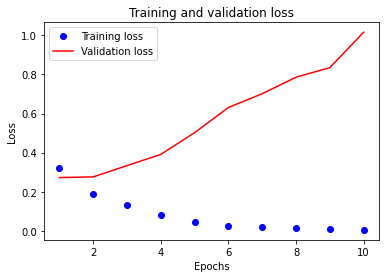

In [ ]:
# vytiahneme si dáta o priebehu trénovania
history_training = results.history
loss_values = history_training['loss']
val_loss_values = history_training['val_loss']

# definícia rozmedzia počtu epoch pre zobrazenie na ose X
epochs = range(1, len(history_training['loss']) + 1)

# vizualizácia vývoja trénovacej a validačnej chyby
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


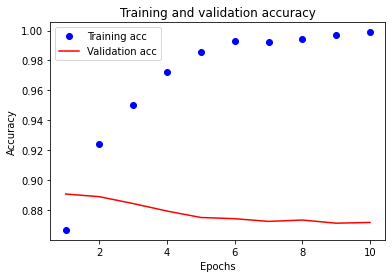

In [ ]:
# vizualizácia vývoja trénovacej a validačnej accuracy
acc_values = history_training['accuracy']
val_acc_values = history_training['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# porovnanie priemernej accuracy trénovacieho a validačného setu
accuracy_training = model.evaluate(train_x, train_y)
accuracy_validation = model.evaluate(val_x, val_y)

313/313 [==============================] - 1s 2ms/step - loss: 1.0157 - accuracy: 0.8717


# Bojujeme s overfittingom

Epoch 1/3
938/938 [==============================] - 5s 5ms/step - loss: 0.5622 - accuracy: 0.6945 - val_loss: 0.2793 - val_accuracy: 0.8869
Epoch 2/3
938/938 [==============================] - 4s 4ms/step - loss: 0.3287 - accuracy: 0.8633 - val_loss: 0.2766 - val_accuracy: 0.8872
Epoch 3/3
938/938 [==============================] - 4s 4ms/step - loss: 0.2865 - accuracy: 0.8866 - val_loss: 0.2753 - val_accuracy: 0.8901


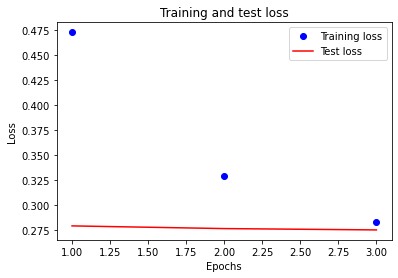

313/313 [==============================] - 1s 2ms/step - loss: 0.2753 - accuracy: 0.8901


In [ ]:
# upravíme našu sieť o dropout vrstvy s dropout rate 50%
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))

# skompilujeme náš 2. model
model2.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

# znížime počet epoch na 3 a zvalidujeme na testovacích dátach
results2 = model2.fit(train_x,
train_y,
epochs=3,
batch_size=32,
validation_data=(test_x, test_y))

history_training2 = results2.history
loss_values2 = history_training2['loss']
val_loss_values2 = history_training2['val_loss']

# definícia rozmedzia počtu epoch pre zobrazenie na ose X
epochs = range(1, len(history_training2['loss']) + 1)

# vizualizácia vývoja trénovacej a testovacej chyby
plt.plot(epochs, loss_values2, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values2, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# urobíme evaluáciu na testovacom datasete
results2 = model2.evaluate(train_x, train_y)
results2 = model2.evaluate(test_x, test_y)


# Predikcia sentimentu pomocou modelu

# Nová sekcia

In [ ]:
# vygenerujeme si pravdepodobnosť pozitívnej recenzie u recenzií v testovacom sete 
predictions = model2.predict(test_x)

# zobrazíme si pravdepodobnosť pozitivity prvej recenzie
print(predictions[0])

[0.9919338]
